# Neural Network Implementation on Breast cancer data from scratch


In [80]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [106]:
#importing data
def load_data():
    #reading csv file
    b=pd.read_csv('L:\Starting Neural Network\second neural network\data.csv')
    c=np.array(b)
    c[:,2:-1]= c[:,2:-1] / c[:,2:-1].max(axis=0)
    np.random.shuffle(c)
    train_data=c[0:400,2:-1]
    train_detect=c[0:400,1]
    test_data=c[400:-1,2:-1]
    test_detect=c[400:-1,1]
    test_label=[]
    train_label=[]
    for i in train_detect:
        if i=='M':
            train_label.append(1)
        else:
            train_label.append(0)
    for i in test_detect:
        if i=='M':
            test_label.append(1)
        else:
            test_label.append(0)
    train_label=np.array(train_label).reshape(len(train_label),1)
    return train_data,train_label,test_data,test_label


In [102]:
class NeuralNetwork():
    
    def __init__(self,train_data):
        '''Seed the random number generator'''
        np.random.seed(1)
        l1_size=np.shape(train_data)[1]
        hidden_l1 = 20
        hidden_l2 = 10
        n_class = 1
        stddev1 = np.sqrt(2/(l1_size+hidden_l1))
        stddev2 = np.sqrt(2/(hidden_l1+hidden_l2))
        stddev3 = np.sqrt(2/(hidden_l2+n_class))
        '''Initialize weghts and biases'''
        self.synaptic_weights1 = np.random.normal(0,stddev1,[l1_size,hidden_l1])
        self.synaptic_weights2 = np.random.normal(0,stddev2,[hidden_l1,hidden_l2])
        self.synaptic_weights3 = np.random.normal(0,stddev3,[hidden_l2,n_class])
        self.bias1 = 1
        self.bias2 = 1
        self.bias3 = 1
        '''Gradient variables'''
        self.grad1=0
        self.grad2=0
        self.grad3=0
        self.bias_grad1=0
        self.bias_grad2=0
        self.bias_grad3=0


    def sigmoid(self, x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_derivative(self, x):
        """
        The derivative of the sigmoid function used to
        calculate necessary weight adjustments
        """
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations, mode="normal"):
        """
        We train the model through trial and error, adjusting the
        synaptic weights each time to get a better result
        """
        learning_rate=0.01
        for iteration in range(training_iterations):
            # Pass training set through the neural network
            inputs = training_inputs.astype(float).reshape(1,np.shape(train_data)[1])
            a1 = self.sigmoid(np.dot(inputs, self.synaptic_weights1)+self.bias1)
            a2 = self.sigmoid(np.dot(a1, self.synaptic_weights2)+self.bias2)
            a3 = self.sigmoid(np.dot(a2, self.synaptic_weights3)+self.bias3)
            # Multiply error by input and gradient of the sigmoid function
            # Less confident weights are adjusted more through the nature of the function
            if mode=="normal":
                '''This division is for non-convex function's gradient calculation'''
                # Calculate the error rate
                error = (training_outputs - a3)
                J=np.sum(error,axis=0)
                '''weight gradient'''
                self.grad3 = np.matmul(a2.T, error * self.sigmoid_derivative(a3))
                self.grad2 = np.matmul(np.transpose(a1),np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2))
                upd=np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                self.grad1 = np.matmul(np.transpose(inputs),(self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2))))
                '''bias gradient'''
                bias_grad3_tot = error * self.sigmoid_derivative(a3)
                bias_grad2_tot = np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                upd1=np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                bias_grad1_tot = (self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2)))
                self.bias_grad3 = np.mean(bias_grad3_tot,axis=0)
                self.bias_grad2 = np.mean(bias_grad2_tot)
                self.bias_grad1 = np.mean(bias_grad1_tot)
                
            else:
                '''This division is for convex function's gradient calculation'''
                cost = (training_outputs*np.log(a3)) + ((1-training_outputs)*np.log(1-a3))
                J=np.sum(cost,axis=0)
                error=a3-training_outputs
                self.grad3 = np.matmul(a2.T, error)
                self.grad2 = np.matmul(np.transpose(a1),np.matmul(error,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2))
                upd=np.matmul(error,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                self.grad1 = np.matmul(np.transpose(inputs),(self.sigmoid_derivative(a1)*np.dot(upd,np.transpose(self.synaptic_weights2))))
                '''bias gradient'''
                bias_grad3_tot = error
                bias_grad2_tot = np.matmul(error ,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                upd1=np.matmul(error ,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                bias_grad1_tot = (self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2)))
                self.bias_grad3 = np.mean(bias_grad3_tot)
                self.bias_grad2 = np.mean(bias_grad2_tot)
                self.bias_grad1 = np.mean(bias_grad1_tot)
            
            # Adjust synaptic weights
            self.synaptic_weights1 -= self.grad1*learning_rate
            self.synaptic_weights2 -= self.grad2*learning_rate
            self.synaptic_weights3 -= self.grad3*learning_rate
            # Adjust bias
            self.bias1 -= self.bias_grad1*learning_rate
            self.bias2 -= self.bias_grad2*learning_rate
            self.bias3 -= self.bias_grad3*learning_rate
            
        return J

    def think(self, inputs):
        """
        Pass inputs through the neural network to get output
        """
        
        inputs = inputs.astype(float)
        a1 = self.sigmoid(np.dot(inputs, self.synaptic_weights1)+self.bias1)
        a2 = self.sigmoid(np.dot(a1, self.synaptic_weights2)+self.bias2)
        a3 = self.sigmoid(np.dot(a2, self.synaptic_weights3)+self.bias3)
        return (a3)  
    
    

Loss in iteration 0 : 0.7020043890102992
Loss in iteration 1 : 0.6661643605344907
Loss in iteration 2 : 0.665132668354751
Loss in iteration 3 : 0.6639027489718998
Loss in iteration 4 : 0.6624742632626043
Loss in iteration 5 : 0.6607763038135178
Loss in iteration 6 : 0.6587136122174018
Loss in iteration 7 : 0.656158767303598
Loss in iteration 8 : 0.6529446746606514
Loss in iteration 9 : 0.648861768781451
Loss in iteration 10 : 0.6436656457279093
Loss in iteration 11 : 0.6370949772396517
Loss in iteration 12 : 0.6288833138710413
Loss in iteration 13 : 0.6187431429858804
Loss in iteration 14 : 0.6063351324419096
Loss in iteration 15 : 0.5912749545010062
Loss in iteration 16 : 0.5732110996416563
Loss in iteration 17 : 0.5519515545076655
Loss in iteration 18 : 0.5275844587621051
Loss in iteration 19 : 0.5005420047307004
Loss in iteration 20 : 0.47158392744145294
Loss in iteration 21 : 0.4417050083015722
Loss in iteration 22 : 0.4119880914652763
Loss in iteration 23 : 0.3834376469441901
Loss

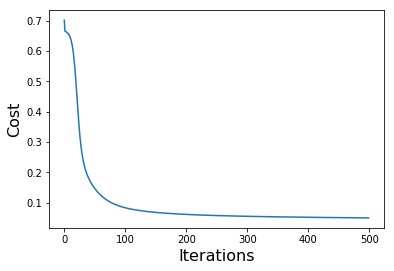

In [104]:
if __name__ == "__main__":
    '''
    Getting data
    '''
    train_data,train_label,test_data,test_label = load_data()
    iterations=500
    #print(train_data)
    hi=NeuralNetwork(train_data)
    cost=[0]*iterations
    for j in range (iterations):
        cost_per_data=0
        for i in range (len(train_data)):
            cost_per_data += hi.train(train_data[i],train_label[i],1,"log")
        cost[j] = abs(np.mean(cost_per_data)/len(train_data))
        print("Loss in iteration",j,":",cost[j])
    plt.plot(cost)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Cost', fontsize=16)
    plt.show()


In [105]:
#Finding Accuracy
valid=(hi.think(train_data)>=0.5)*1
test=(hi.think(test_data)>=0.5)*1
check_train=0
check_test=0
j=0
for i in range (len(valid)):
    if valid[i]==train_label[i]:
        check_train += 1
    if j<len(test):
        if test[j]==test_label[j]:
            check_test += 1
    j=j+1
train_accuracy=100*(check_train/len(valid))
test_accuracy=100*(check_test/len(test))

print("Train Accuracy:",train_accuracy)
print ("Test Accuracy:",test_accuracy)



Train Accuracy: 98.25
Test Accuracy: 96.42857142857143


In [ ]:
'''
at 150 iteration :: Train Accuracy: 97.75       Test Accuracy: 96.42857142857143

at 60 iterations :: Train Accuracy: 96.75       Test Accuracy: 96.42857142857143
'''